# Expirementation of training of a After State Player  other type of players

## 1. Initialization

### 1.1. Importation of modules and functions

We start by import all important modules and functions that we can find in the link https://github.com/fcarsten/tic-tac-toe/tree/master/tic_tac_toe 

In [1]:
%matplotlib inline
import random as rd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from tic_tac_toe.Player import Player
from tic_tac_toe.RandomPlayer import RandomPlayer
from tic_tac_toe.MinMaxAgent import MinMaxAgent
from tic_tac_toe.RndMinMaxAgent import RndMinMaxAgent
from tic_tac_toe.TabularQPlayer import TQPlayer

from tic_tac_toe.AfterStatePlayer import ASPlayer
from tic_tac_toe.AfSt import ASPlayer2
from tic_tac_toe.SymmetricTabularQPlayer import SYMTQPlayer
from tic_tac_toe.SymmetricAfterStatePlayer import SYM_ASPlayer
from tic_tac_toe.AfterStateTabularQPlayer import TQ_ASPlayer
from tic_tac_toe.SymmetricAfterStateTabularQPlayer import SYM_TQ_ASPlayer

from util import battle

## 2. Experiment of earning of a AS Player of other players

### 2.1. Let define a new function experiment

This particular function takes as parameters 2 players and calculates the the average performance of each player for 10 series of 10 battles where each battle has defaultly 100 games and output.

In [23]:
def experiments(p1: Player, p2: Player, num_battles = 100, num_games_train = 10, series =10, 
                num_games_eval = 100,loc='best'):
    s_p1win = []
    s_p2win = []
    s_draw = []
    
    for k in range(series):
        
        p1_wins = []
        p2_wins = []
        draws = []
        count = []    

        for i in range(num_battles):
            p1win, p2win, draw = battle(p1, p2, num_games_train,num_games_eval, True)
            p1_wins.append(p1win)
            p2_wins.append(p2win)
            draws.append(draw)
            
        s_p1win.append(p1_wins)
        s_p2win.append(p2_wins)
        s_draw.append(draws)
        
    data_p1 = np.average(np.array(s_p1win), axis = 0)
    std_p1 = np.std(np.array(s_p1win), axis=0)
    
    data_p2 = np.average(np.array(s_p2win), axis = 0)
    std_p2 = np.std(np.array(s_p2win), axis=0)
    
    data_draw = np.average(np.array(s_draw), axis = 0)
    std_draw = np.std(np.array(s_draw), axis=0)
    
    x = np.arange(num_battles)    
    
    plt.title('Agents Evalution ')
    plt.ylabel('Battle outcomes')
    plt.xlabel('Battles')
    plt.errorbar(x, data_draw, yerr=std_draw,  label='Mean Draw')
    plt.errorbar(x,data_p1, yerr=std_p1, label='Player1 mean wins')
    plt.errorbar(x,data_p2, yerr=std_p2, label='P2 mean wins')
    plt.legend( shadow=True, fancybox=True, framealpha =0.7,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### 2.2. We used the following battle function

In [11]:
def battle(player1: Player, player2: Player, num_games_train:int = 100, num_games_eval: int = 100000, silent: bool = False): ## Added function
    board = Board()
    draw_count = 0
    cross_count = 0
    naught_count = 0
    for _ in range(num_games_train):
        play_train(board, player1, player2)
        
    for _ in range(num_games_eval):
        result = play_eval(board, player1, player2)
        if result == GameResult.CROSS_WIN:
            cross_count += 1
        elif result == GameResult.NAUGHT_WIN:
            naught_count += 1
        else:
            draw_count += 1

    if not silent:
        print("After {} game we have draws: {}, Player 1 wins: {}, and Player 2 wins: {}.".format(num_games, draw_count,
                                                                                                  cross_count,
                                                                                                  naught_count))

        print("Which gives percentages of draws: {:.2%}, Player 1 wins: {:.2%}, and Player 2 wins:  {:.2%}".format(
            draw_count / num_games, cross_count / num_games, naught_count / num_games))

    return cross_count, naught_count, draw_count

## 3. Experiment of training against the Random Player for the AS Player and TQ Player

### 3.1. When they are coming second against the Random Player

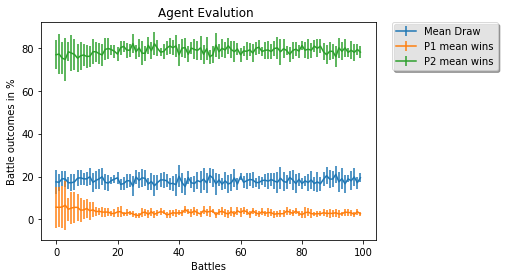

In [4]:
Rdlayer = RandomPlayer()
AsPlayer = SYM_ASPlayer()
experiments(Rdlayer, AsPlayer)

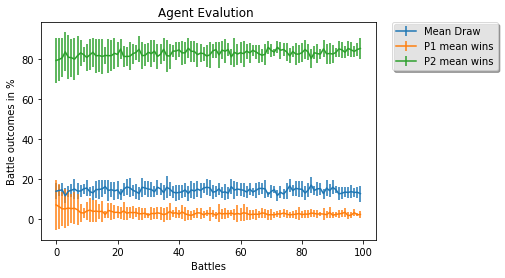

In [5]:
Rdlayer = RandomPlayer()
AsPlayer = SYM_ASPlayer(epsilon = 0.05)
experiments(Rdlayer,AsPlayer )

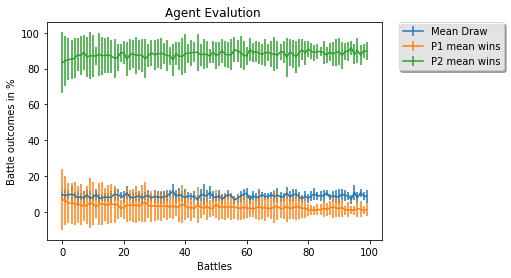

In [9]:
Rdlayer = RandomPlayer()
TsPlayer = TQPlayer()
experiments(Rdlayer, TsPlayer)

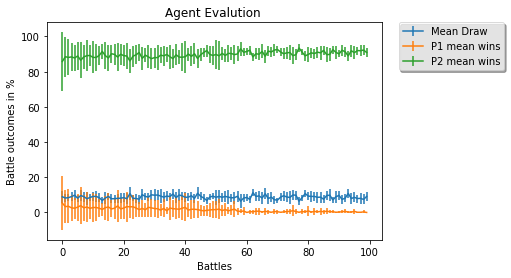

In [7]:
Rdlayer = RandomPlayer()
TsPlayer = SYM_TQ_ASPlayer()
experiments(Rdlayer, TsPlayer)

We notice that the AS Player is performing well than the TQ Player, because the AS Player is making more win and more draw in average than the TQ Player

### 3.2. When they are going first against the Random Player

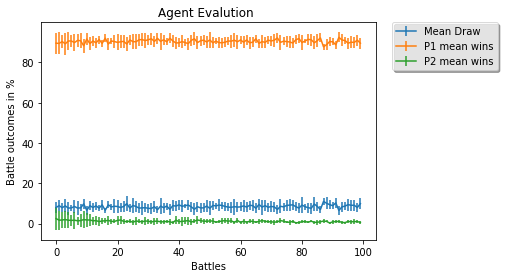

In [8]:
Rdlayer = RandomPlayer()
AsPlayer = ASPlayer()
experiments(AsPlayer, Rdlayer)

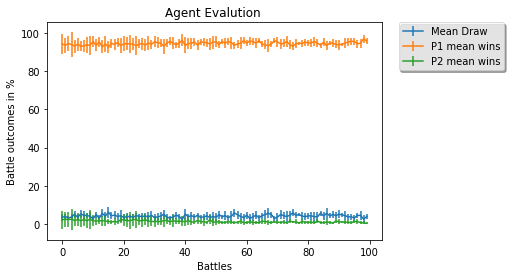

In [10]:
Rdlayer = RandomPlayer()
AsPlayer = AS_symPlayer()
experiments(AsPlayer, Rdlayer)

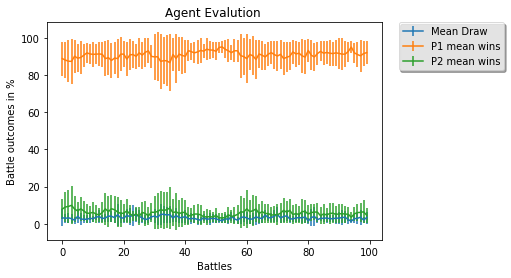

In [9]:
Rdlayer = RandomPlayer()
TsPlayer = TQPlayer()
experiments(TsPlayer, Rdlayer)

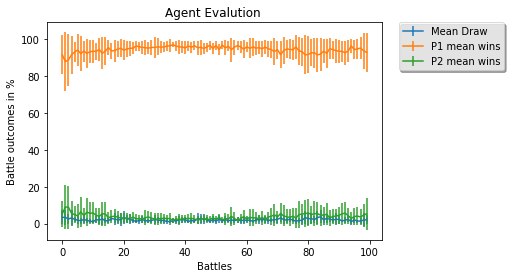

In [11]:
Rdlayer = RandomPlayer()
TsPlayer = TQ_ASPlayer()
experiments(TsPlayer, Rdlayer)

We notice the same thing as above. AS Player is performing better

## 4. Experiment with the MinMax

### 4.1. When they are going second

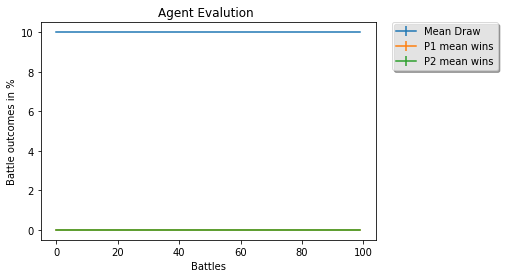

In [15]:
MinMaxplayer = MinMaxAgent()
AsPlayer = ASPlayer()
experiments(MinMaxplayer, AsPlayer)

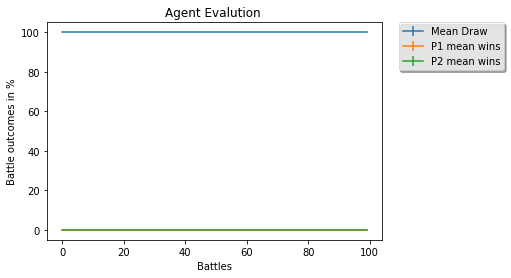

In [13]:
MinMaxplayer = MinMaxAgent()
AsPlayer = SYM_ASPlayer()
experiments(MinMaxplayer, AsPlayer)

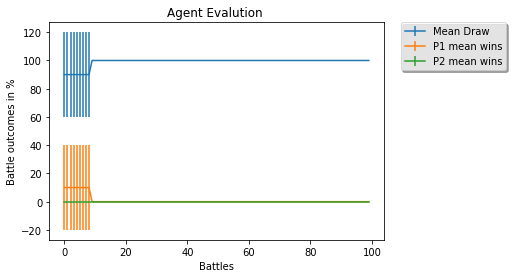

In [24]:
MinMaxplayer = MinMaxAgent()
TqPlayer = TQPlayer()
experiments(MinMaxplayer, TqPlayer)

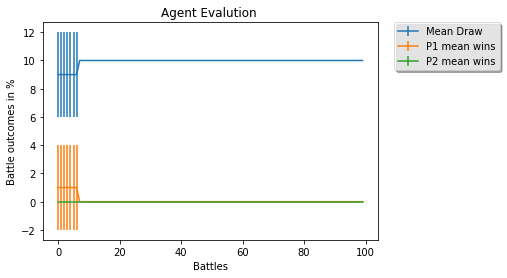

In [17]:
MinMaxplayer = MinMaxAgent()
TqPlayer = TQ_ASPlayer()
experiments(MinMaxplayer, TqPlayer)

The AS Player seems to perform well than the TQ Player

### 4.2. When they are going first

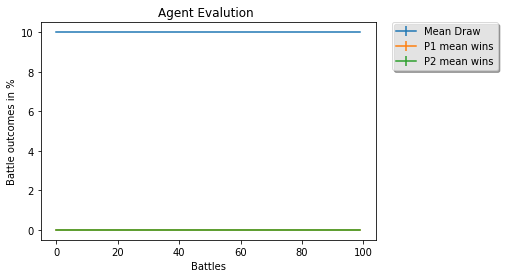

In [18]:
MinMaxplayer = MinMaxAgent()
AsPlayer = ASPlayer()
experiments(AsPlayer, MinMaxplayer)

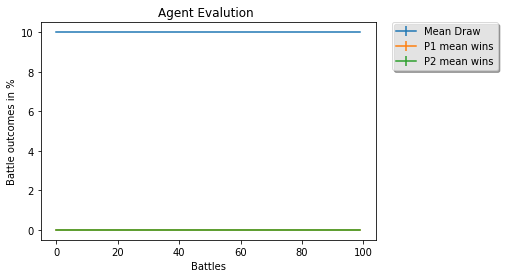

In [20]:
MinMaxplayer = MinMaxAgent()
AsPlayer = SYM_ASPlayer()
experiments(AsPlayer, MinMaxplayer)

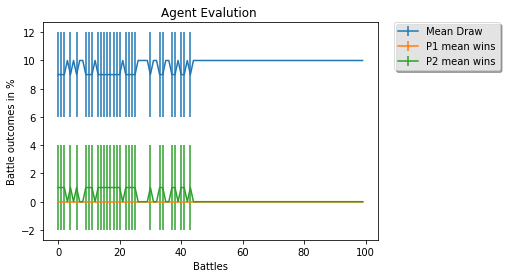

In [21]:
MinMaxplayer = MinMaxAgent()
TqPlayer = TQPlayer()
experiments(TqPlayer, MinMaxplayer)

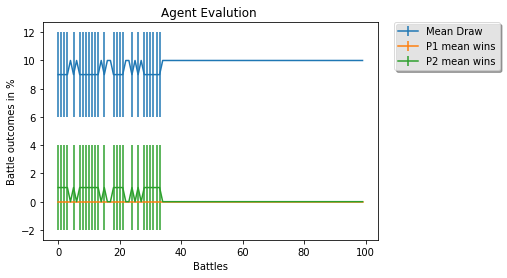

In [22]:
MinMaxplayer = MinMaxAgent()
TqPlayer = TQ_ASPlayer()
experiments(TqPlayer, MinMaxplayer)

The same result here

## 5. Experiment  with the random MiniMax Player

### 5.1. When they are coming second

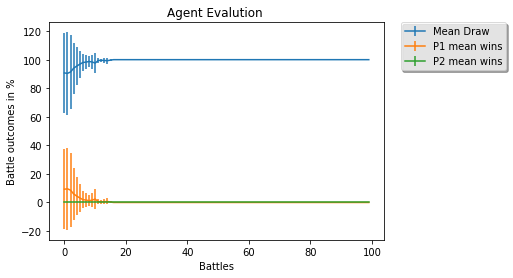

In [11]:
RdMinMaxplayer = RndMinMaxAgent()
AsPlayer = ASPlayer()
experiments(RdMinMaxplayer, AsPlayer)

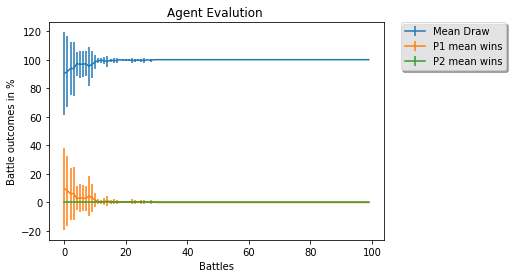

In [13]:
RdMinMaxplayer = RndMinMaxAgent()
AsPlayer = SYM_ASPlayer()
experiments(RdMinMaxplayer, AsPlayer)

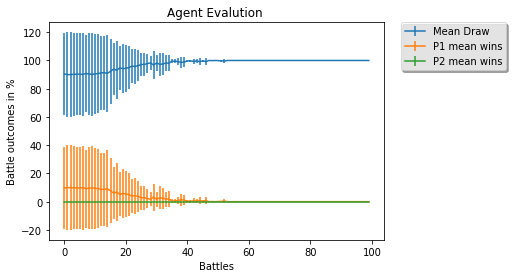

In [9]:
RdMinMaxplayer = RndMinMaxAgent()
TqPlayer = TQPlayer()
experiments(RdMinMaxplayer, TqPlayer)

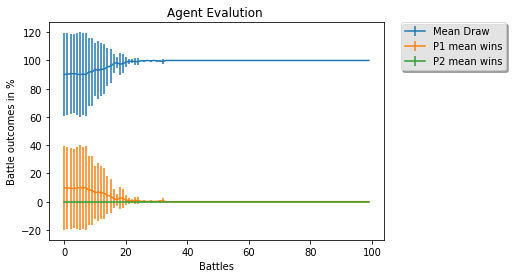

In [10]:
RdMinMaxplayer = RndMinMaxAgent()
TqPlayer = TQ_ASPlayer()
experiments(RdMinMaxplayer, TqPlayer)

We also notice that the TQ Player is still slow than the AS Player

### 5.2. When they are going first

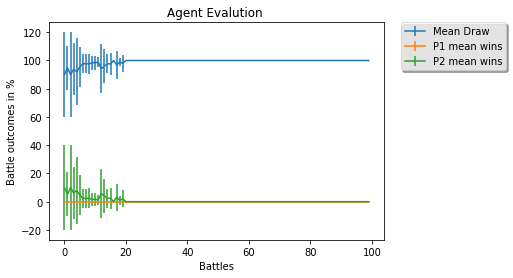

In [25]:
RdMinMaxplayer = RndMinMaxAgent()
AsPlayer = ASPlayer()
experiments(AsPlayer, RdMinMaxplayer)

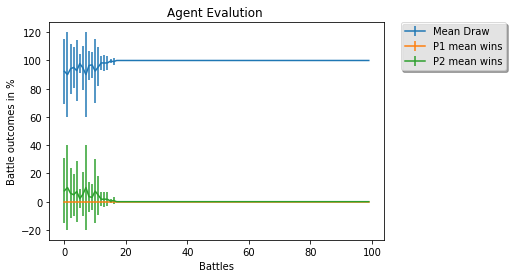

In [29]:
RdMinMaxplayer = RndMinMaxAgent()
AsPlayer = AS_symPlayer()
experiments(AsPlayer, RdMinMaxplayer)

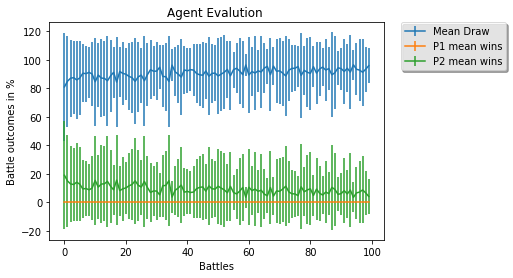

In [27]:
RdMinMaxplayer = RndMinMaxAgent()
TqPlayer = TQPlayer()
experiments(TqPlayer, RdMinMaxplayer)

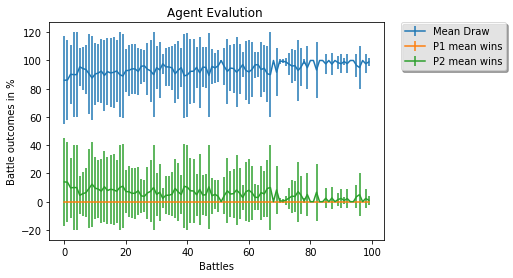

In [28]:
RdMinMaxplayer = RndMinMaxAgent()
TqPlayer = TQ_ASPlayer()
experiments(TqPlayer, RdMinMaxplayer)

The same resut as above

## 6. Conclusion

The AS Player we implement has shown that it is faster than the TQ Player when it comes to training with other kind of players.

However it has shown that it is not a good trainer for itself if it comes to be evaluated with other players. With itself it's reaching optimallity verry fast but it stay still beatable by other players.